In [2]:
# import tensorflow.compat.v2 as tf
# import tensorflow_hub as hub
import PIL.Image as Image
import numpy as np

In [4]:
IMAGE_SHAPE = (224,224)

In [12]:
# batch of decoded images with shape (batch, 224, 224, 3)
image  = Image.open('../birds_data/trainset/img/bird/task_05-01-2021/2021-01-05-15-59-29.jpg').resize(IMAGE_SHAPE)
image = np.array(image) / 255.0
image = image[np.newaxis, ...]
classify = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1', input_shape = IMAGE_SHAPE+(3,))
])
result = classify.predict(image)
predicted_label = np.argmax(result)
print(predicted_label)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


695


# Database exploration

In [3]:
import pandas as pd
import os
import xml.etree.ElementTree as ET
global_xml_path = '/home/acarlier/OrnithoMate/p0133_bird_data/annotations/'
task_path = os.listdir(os.path.join(global_xml_path))

In [4]:
data = []
for global_task in task_path:
    spe_xml_path = f'{global_xml_path}{global_task}/Annotations/bird/'
    for task in os.listdir(spe_xml_path):
        spe_task_path = f'{spe_xml_path}{task}/'
        for xml in os.listdir(spe_task_path):
            database = {}
            file_name = f"{task}/{xml}"
            tree = ET.parse(f"{spe_task_path}{xml}")
            root = tree.getroot()
            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)
            object_number = len(root.findall('object'))
            database["file_name"] = file_name
            database["object_number"] = object_number
            database['width'] = width
            database['height'] = height
            data.append(database)

In [5]:
df = pd.DataFrame(data)
df["resolution"] = df['width']*df['height']
df.head(10)

,file_name,object_number,width,height,resolution
0,task_2021-03-01_13/20210301-134116_(5.0).xml,1,1920,1088,2088960
1,task_2021-03-01_13/20210301-134909_(5.0).xml,1,1920,1088,2088960
2,task_2021-03-01_13/20210301-130804_(5.0).xml,1,1920,1088,2088960
3,task_2021-03-01_13/20210301-132232_(10.0).xml,1,1920,1088,2088960
4,task_2021-03-01_13/20210301-134941_(6.0).xml,1,1920,1088,2088960
5,task_2021-03-01_13/20210301-135545_(8.0).xml,1,1920,1088,2088960
6,task_2021-03-01_13/20210301-134705_(9.0).xml,1,1920,1088,2088960
7,task_2021-03-01_13/20210301-135042_(11.0).xml,1,1920,1088,2088960
8,task_2021-03-01_13/20210301-135536_(12.0).xml,1,1920,1088,2088960
9,task_2021-03-01_13/20210301-134823_(7.0).xml,1,1920,1088,2088960


In [15]:
import pickle
_ = df[df['object_number'] == 0]
no_object = list(_["file_name"])
len(no_object)
pickle.dump(no_object, open( "/home/acarlier/code/OrnithoScope_keras/keras_yolo2/keras_yolov2/pickles/no_obj_xml.p", "wb" ) )

In [53]:
print(df["object_number"].unique())
print(df["width"].unique())
print(df["height"].unique())
print(df["resolution"].unique())
list_of_specific_res = list(df["resolution"].unique())

[1 2 0 3 4 7]
[1920  674  600  399  675  450  500  599  667  663  589  597  618  548
  580  653]
[1088 1080  450  600  338  432  339  336  389  399  449  440  412  326
  299  448]
[2088960 2073600  303300  270000  239400  303750  152100  291600  169500
  151200  262575  269550  300150  179550  298350  303075  265050  268650
  278100  241120  261000  146700  134550  302400  293850]


In [76]:
equivalence_res = {}
for res in list_of_specific_res:
    equivalence_res[res] = [df.query(f'resolution == {res}')['width'].iloc[0],
                            df.query(f'resolution == {res}')['height'].iloc[0]]
equivalence_res

{2088960: [1920, 1088],
 2073600: [1920, 1080],
 303300: [674, 450],
 270000: [600, 450],
 239400: [399, 600],
 303750: [675, 450],
 152100: [450, 338],
 291600: [675, 432],
 169500: [500, 339],
 151200: [450, 336],
 262575: [675, 389],
 269550: [599, 450],
 300150: [667, 450],
 179550: [450, 399],
 298350: [663, 450],
 303075: [675, 449],
 265050: [589, 450],
 268650: [597, 450],
 278100: [618, 450],
 241120: [548, 440],
 261000: [580, 450],
 146700: [450, 326],
 134550: [450, 299],
 302400: [675, 448],
 293850: [653, 450]}

In [78]:
df_equivalence = pd.DataFrame({"res": equivalence_res.keys(), 'equivalence': equivalence_res.values()})
df_equivalence

,res,equivalence
0,2088960,"[1920, 1088]"
1,2073600,"[1920, 1080]"
2,303300,"[674, 450]"
3,270000,"[600, 450]"
4,239400,"[399, 600]"
5,303750,"[675, 450]"
6,152100,"[450, 338]"
7,291600,"[675, 432]"
8,169500,"[500, 339]"
9,151200,"[450, 336]"


/home/acarlier/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Rectangle' object has no property 'size'

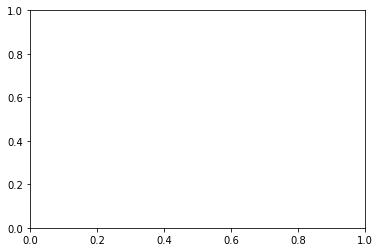

In [68]:
import seaborn as sns

sns.barplot('res', 'iter', data=df_res, size=(15,30))

In [79]:
iter_res = {}
for res in list_of_specific_res:
    iter_res[res] = len(df[df['resolution'] == res])
df_res = pd.DataFrame({'res': list(iter_res.keys()), 'equivalence': df_equivalence['equivalence'], 'iter': list(iter_res.values())})
df_res

,res,equivalence,iter
0,2088960,"[1920, 1088]",9517
1,2073600,"[1920, 1080]",6870
2,303300,"[674, 450]",1
3,270000,"[600, 450]",8
4,239400,"[399, 600]",1
5,303750,"[675, 450]",9
6,152100,"[450, 338]",3
7,291600,"[675, 432]",4
8,169500,"[500, 339]",1
9,151200,"[450, 336]",1


# Resize input coordinates

In [10]:
import pandas as pd
import cv2


In [3]:
columns_input_data = [
                        "file_path",
                        "x_min", "y_min",
                        "x_max", "y_max", 
                        "label"
                    ]

In [7]:
input_train_csv = pd.read_csv("/home/acarlier/code/OrnithoScope_keras/keras_yolo2/birds_data_csv/input_train.csv",names=columns_input_data, header=None)
input_test_csv = pd.read_csv("/home/acarlier/code/OrnithoScope_keras/keras_yolo2/birds_data_csv/input_test.csv",names=columns_input_data, header=None)
input_train_csv.head(2)

,file_path,x_min,y_min,x_max,y_max,label
0,/home/acarlier/code/data_ornithoscope/p0133_bi...,0.5558,0.3581,0.7055,0.5479,MESCHA
1,/home/acarlier/code/data_ornithoscope/p0133_bi...,0.4613,0.5550,0.9990,1.0000,SITTOR


In [19]:
def change_res_img(df_input):
    df = df_input.reset_index() 
    for index, row in df.iterrows():
        img = cv2.imread(row['file_path'])
        wid = img.shape[1]
        hgt = img.shape[0]
        xmin = row['x_min']*wid
        xmax = row['x_max']*wid
        ymin = row['y_min']*hgt
        ymax = row['y_max']*hgt
        df.at[index,'x_min'] = xmin
        df.at[index,'x_max'] = xmax
        df.at[index,'y_min'] = ymin
        df.at[index,'y_max'] = ymax
    return df

In [17]:
df_test = input_train_csv.head(2)
df_test.shape

(2, 6)

In [18]:
df_post_resize = change_res_img(df_test)
df_post_resize

,index,file_path,x_min,y_min,x_max,y_max,label
0,0,/home/acarlier/code/data_ornithoscope/p0133_bi...,1067.136,389.6128,1354.56,596.1152,MESCHA
1,1,/home/acarlier/code/data_ornithoscope/p0133_bi...,885.696,603.8400,1918.08,1088.0000,SITTOR


In [20]:
a = change_res_img(input_train_csv)
b = change_res_img(input_test_csv)

'0,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090002_(13.0).jpg,488.25600000000003,40.3648,881.856,769.76,VEREUR\n1,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090008_(9.0).jpg,1024.704,441.728,1366.272,1082.3424,MESCHA\n2,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090012_(23.0).jpg,1001.4719999999999,599.9232,1916.16,1088.0,MESCHA\n3,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090017_(10.0).jpg,1227.264,482.3104,1458.816,885.5232,MESCHA\n4,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090017_(10.0).jpg,576.96,435.9616,1111.4879999999998,708.0704000000001,VEREUR\n5,/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/task_2021-03-01_09/20210301-090021_(14.0).jpg,1366.272,599.9232,1528.3200000000002,895.2064,MESCHA\n6,/home/acarlier/code/data_orn

In [24]:
a.to_csv('train_post_resize.csv',index=False,header=False)
b.to_csv('test_post_resize.csv',index=False,header=False)

# Add height and width

In [13]:
columns_input_data = [
                        "file_path",
                        "x_min", "y_min",
                        "x_max", "y_max", 
                        "label"
                    ]

In [14]:
import pandas as pd
import cv2
df_train = pd.read_csv('/home/acarlier/code/project_ornithoScope/src/data/input_randomized/input_train_random.csv',names=columns_input_data, header=None)
df_test = pd.read_csv('/home/acarlier/code/project_ornithoScope/src/data/input_randomized/input_test_random.csv',names=columns_input_data, header=None)

In [15]:
df_train.head(2)

,file_path,x_min,y_min,x_max,y_max,label
0,task_20210611_Lab/2021-06-11-15-29-09.jpg,0.2710,0.2110,0.5707,0.5213,MESCHA
1,task_20210616_Lab/2021-06-16-18-28-03.jpg,0.7524,0.2104,0.8672,0.5086,MESCHA


In [16]:
train_csv_base_path="/home/acarlier/code/data_ornithoscope/p0133_bird_data/raw_data/"

In [17]:
def add_res_img(df_input):
    df = df_input.reset_index() 
    for index, row in df.iterrows():
        img = cv2.imread(train_csv_base_path + row['file_path'])
        wid = img.shape[1]
        hgt = img.shape[0]
        df.loc[index,'width'] = wid
        df.loc[index,'height'] = hgt
    return df

In [18]:
df_train_res = add_res_img(df_train)

In [23]:
df_train_res.height.unique()

array([1080., 1088.,  450.,  432.,  448.,  326.,  338.,  440.,  600.,
        399.,  339.,  389.,  336.])

In [19]:
df_test_res = add_res_img(df_test)

In [25]:
df_test_res.height.unique()

array([1088., 1080.,  432.,  450.,  389.,  299.,  449.,  338.,  412.])

In [26]:
del df_test_res["index"]
del df_train_res["index"]

In [27]:
df_train_res.to_csv('/home/acarlier/code/project_ornithoScope/src/data/input_randomized/input_train_random_res.csv',index=False,header=False)


In [28]:
df_test_res.to_csv('/home/acarlier/code/project_ornithoScope/src/data/input_randomized/input_test_random_res.csv',index=False,header=False)
